In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_deliveries = pd.read_csv('deliveries.csv')
df_matches = pd.read_csv('matches.csv')

In [3]:
df_matches.head(1)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [4]:
df_deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# Is bowling or batting first a better option at a given venue?


In [54]:
# getting required data from df_deliveries

subset_df = pd.DataFrame()
df_deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [56]:
df_deliveries['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [53]:
df_deliveries[df_deliveries['match_id'] == 1][:1]


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [61]:
for match_id in range(1,637):
        subset_df = subset_df.append(df_deliveries[df_deliveries['match_id'] == match_id][:1])


# Steps Followed:

#1. Merging/Joining df_delv & df_matches df to get all the information we need
    #- Joing is done on the match_id column of delv and id column of matches dataset

In [62]:
merged_df = pd.merge(df_matches, subset_df,left_on='id',right_on='match_id')
merged_df


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [16]:
#2. Take the subset of the df_delv DataFrame with the columns we need
df3 = merged_df[['city','batting_team','bowling_team','winner']]
df3


,city,batting_team,bowling_team,winner
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...,...
631,Raipur,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
632,Bangalore,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore
633,Delhi,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad
634,Delhi,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [65]:
#3. Filtering the data where winner team is same as batting team 
batting_wins = df3[df3['batting_team'] == df3['winner']]['city'].value_counts()
batting_wins

Mumbai            42
Chennai           31
Delhi             27
Bangalore         27
Kolkata           23
Chandigarh        20
Hyderabad         19
Pune              16
Jaipur            10
Durban             8
Ahmedabad          6
Visakhapatnam      6
Cape Town          5
Dharamsala         5
Cuttack            4
Centurion          4
Abu Dhabi          4
Rajkot             3
Port Elizabeth     3
Johannesburg       3
Kochi              3
Nagpur             2
Sharjah            2
Raipur             2
Ranchi             2
East London        2
Bloemfontein       1
Kimberley          1
Name: city, dtype: int64

In [64]:
#Filtering the data where winner team is same as bowling team 
bowling_wins = df3[df3['bowling_team'] == df3['winner']]['city'].value_counts()
bowling_wins

Mumbai            43
Kolkata           38
Bangalore         37
Delhi             32
Hyderabad         30
Chandigarh        26
Jaipur            23
Chennai           17
Pune              16
Centurion          8
Durban             7
Rajkot             7
Ahmedabad          6
Ranchi             5
Indore             5
Visakhapatnam      5
Johannesburg       5
Sharjah            4
Dharamsala         4
Kanpur             4
Raipur             4
Port Elizabeth     4
Cuttack            3
Abu Dhabi          3
Kochi              2
Cape Town          2
Kimberley          2
Bloemfontein       1
East London        1
Nagpur             1
Name: city, dtype: int64

In [66]:
batting = batting_wins.reset_index()
bowling = bowling_wins.reset_index()


In [67]:
batting2 = batting.rename(columns={'index':'city','city':'batting_wins'})
bowling2 = bowling.rename(columns={'index': 'city', 'city':'bowling_wins'})


In [21]:

merged_wins = pd.merge(batting2, bowling2, on='city')
merged_wins.head(10)


,city,batting_wins,bowling_wins
0,Mumbai,42,43
1,Chennai,31,17
2,Delhi,27,32
3,Bangalore,27,37
4,Kolkata,23,38
5,Chandigarh,20,26
6,Hyderabad,19,30
7,Pune,16,16
8,Jaipur,10,23
9,Durban,8,7


<Figure size 1080x720 with 0 Axes>

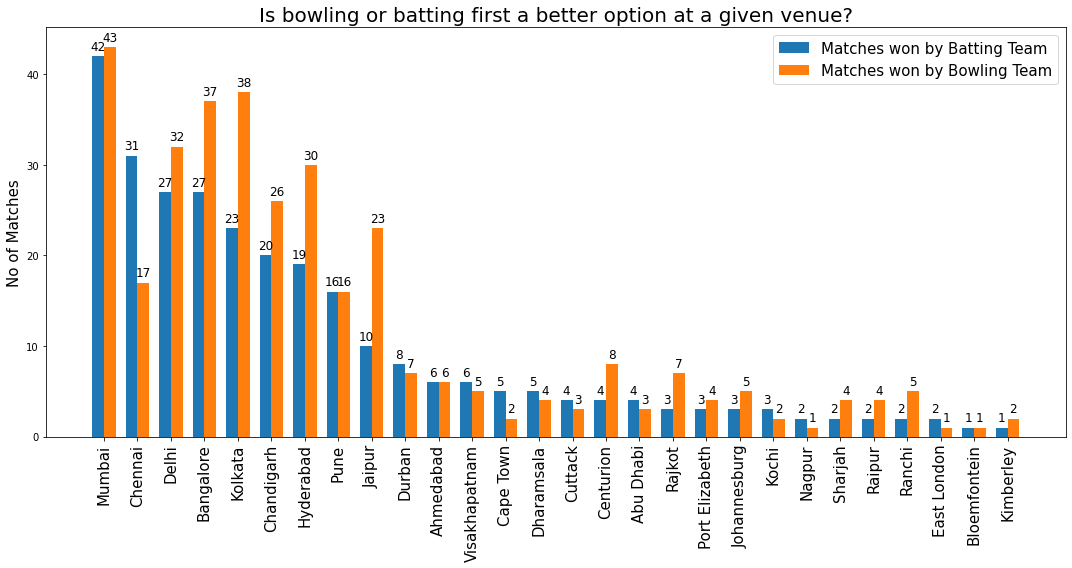

In [31]:
# Plotting
plt.figure(figsize=(15,10))

labels = merged_wins.city
batting_wins = merged_wins.batting_wins
bowling_wins = merged_wins.bowling_wins

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x - width/2, batting_wins, width, label='Matches won by Batting Team')
rects2 = ax.bar(x + width/2, bowling_wins, width, label='Matches won by Bowling Team')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of Matches', fontsize=15)
ax.set_title('Is bowling or batting first a better option at a given venue?', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.legend(fontsize=15)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show();


54.45705024311182


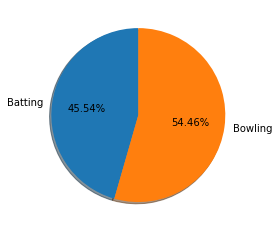

In [77]:
# Pie Chart:
batting_wins = merged_wins['batting_wins'].sum()
bowling_wins = merged_wins['bowling_wins'].sum()
print((bowling_wins/(bowling_wins+batting_wins))*100)
plt.pie([batting_wins,bowling_wins],labels=['Batting','Bowling'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()


**Yes**, From the graph, Bowling First seems to have a **9%** overall advantage over Batting

1.It is clear that Bowling first has an Advantage over Batting in almost all the locations.

2.However in Chennai the Batting Team has won **64%** of the times

3.In Venues like Nagpur, Ahmedabad, Pune - There doesn't seem to be much difference.


# Is there a correlation between the Winning Team and the Location where the match is held?


1.Which Team wons maximum number of times in each location?

2.Find the winning percentage for the winning team


In [78]:
#Steps Followed:
#1. # Finding for a single city - Hyderabad
    #- subsetting only the data corresponding to one city to try the logic:
dataset_hyd = df_matches[df_matches['city'] == 'Hyderabad']


In [85]:
#2. Find the winning percentage for the winning tyeam
    #- i.e. (Match count of Team that won maximum no of matches/ no. of matches that took place there)*100
(dataset_hyd['winner'].value_counts()[:1]/dataset_hyd.shape[0])*100


Sunrisers Hyderabad    46.875
Name: winner, dtype: float64

In [86]:
#3. Applying the same logic to all the cities by using groupby on city columns:
x = df_matches.groupby('city').apply(lambda x: (x['winner'].value_counts()[:1]/x.shape[0])*100)


In [87]:
#4. resetting the indexes, so that the groupby object can be converted into a DataFrame - Easy to work with
x = x.reset_index()

#5. Rename columns accordingly
x.rename(columns={'level_1': 'Winning_Team', 'winner':'winning_perc'}, inplace=True)

#6. In the winning percentage columns, rounding the digit to get only the first decimal
x.winning_perc = round(x.winning_perc,1)


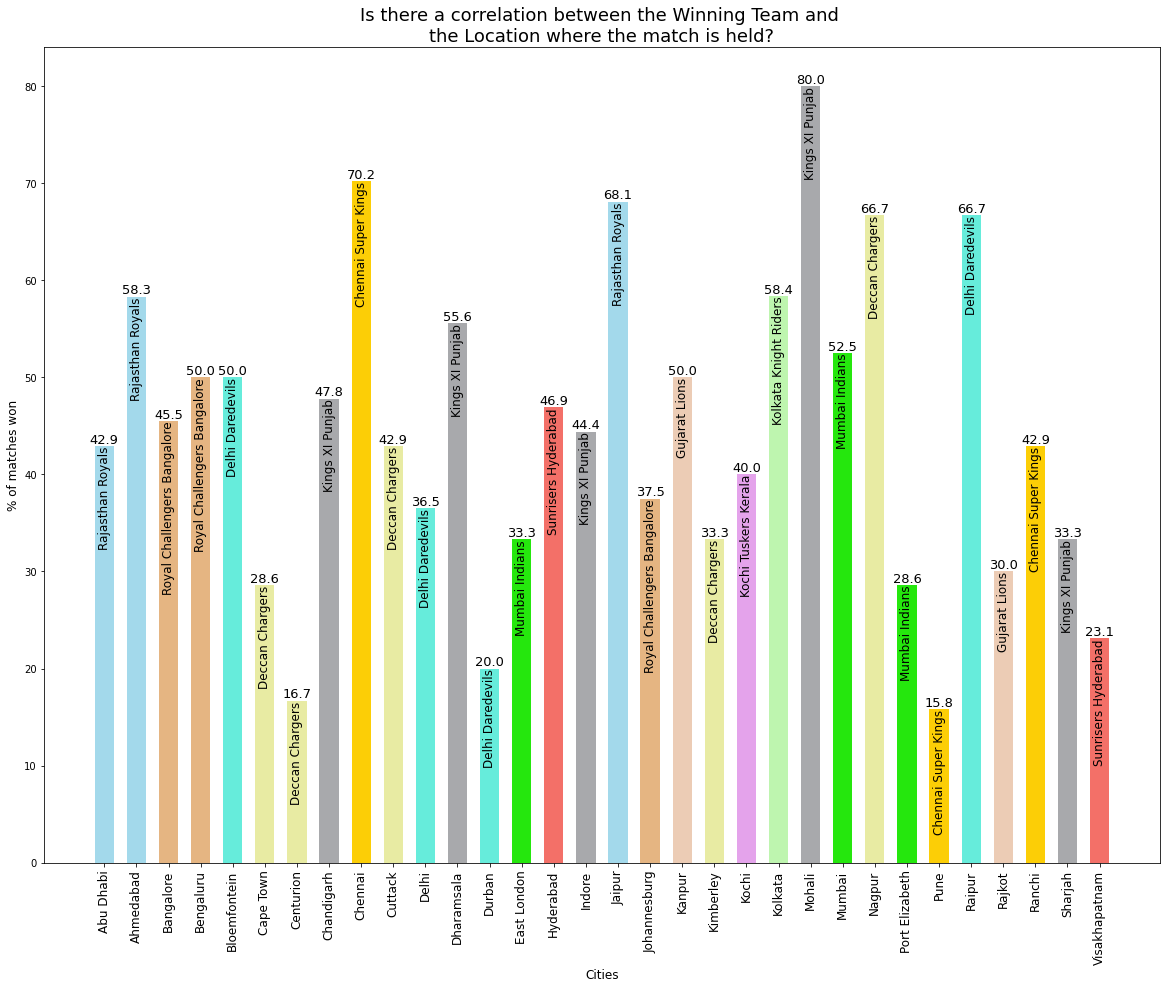

In [94]:
# Plotting the graph:
# Using Bar plot:
plt.figure(figsize=(20,15))
#plt.bar(x.city, x['winning_perc'], width=0.6)
color_dict = {'Rajasthan Royals':'#A3D9EB', 'Royal Challengers Bangalore':'#e5b582',
       'Delhi Daredevils':'#66ECDB', 'Deccan Chargers':'#E8EBA3', 'Kings XI Punjab':'#a8a9ac',
       'Chennai Super Kings':'#fcce06', 'Kolkata Knight Riders':'#BEF5AF',
       'Sunrisers Hyderabad':'#F37068', 'Gujarat Lions':'#ECCCB5', 'Kochi Tuskers Kerala':'#E4A3EB',
       'Mumbai Indians':'#25E70D'}

# The Below code is to have text inside of the bars.
# We need to iterate through every row and set the text
# I have given 2 texts here - 1. Name of the winning team, 2. The percentage of matches it won 
for i in x.iterrows():
    
    plt.bar(i[1].city, i[1].winning_perc, width=0.6, color= color_dict[i[1].Winning_Team])
    plt.text(i[1].city, i[1].winning_perc, i[1].Winning_Team, rotation=90, horizontalalignment='center',verticalalignment='top', color='black', fontsize=12)
    plt.text(i[1].city, i[1].winning_perc, i[1].winning_perc, horizontalalignment='center', verticalalignment='bottom', fontsize=13)
    
plt.xticks(rotation=90, fontsize=12)
plt.xlabel("Cities", fontsize=12)
plt.ylabel("% of matches won", fontsize=12)
plt.title("Is there a correlation between the Winning Team and \nthe Location where the match is held?", fontsize=18)
plt.show()


In [40]:
team_homelands = [['Rajasthan Royals','Jaipur'], ['Royal Challengers Bangalore','Bangalore'],
       ['Delhi Daredevils','Delhi'], ['Deccan Chargers','Nagpur'], ['Kings XI Punjab','Chandigarh'],
       ['Chennai Super Kings','Chennai'], ['Kolkata Knight Riders','Kolkata'],
       ['Sunrisers Hyderabad','Hyderabad'], ['Gujarat Lions','Rajkot'], ['Kochi Tuskers Kerala','Kochi'],
       ['Mumbai Indians','Mumbai']]

homelands_df = pd.DataFrame(team_homelands)
homelands_df

# Merging the tables:
team_homeland = pd.merge(x,homelands_df, left_on='Winning_Team', right_on=0)
team_homeland = team_homeland.rename(columns={1:'homeland'})

team_homeland[team_homeland['city'] == team_homeland['homeland']]['winning_perc'].mean()


51.14545454545455

Question 3: Who are the top 10 Players and what is their batting trend over years in IPL ?

Calculating Top 10 Batsmen: I am going to pick the batsmen that scored 'Player_of_the_match' most number of the times in all the IPL matches so far. Plotiing the trend line: I am going to plot average(total batsman_runs per match) - plotting this score for every top Batsman across all the seasons of IPL



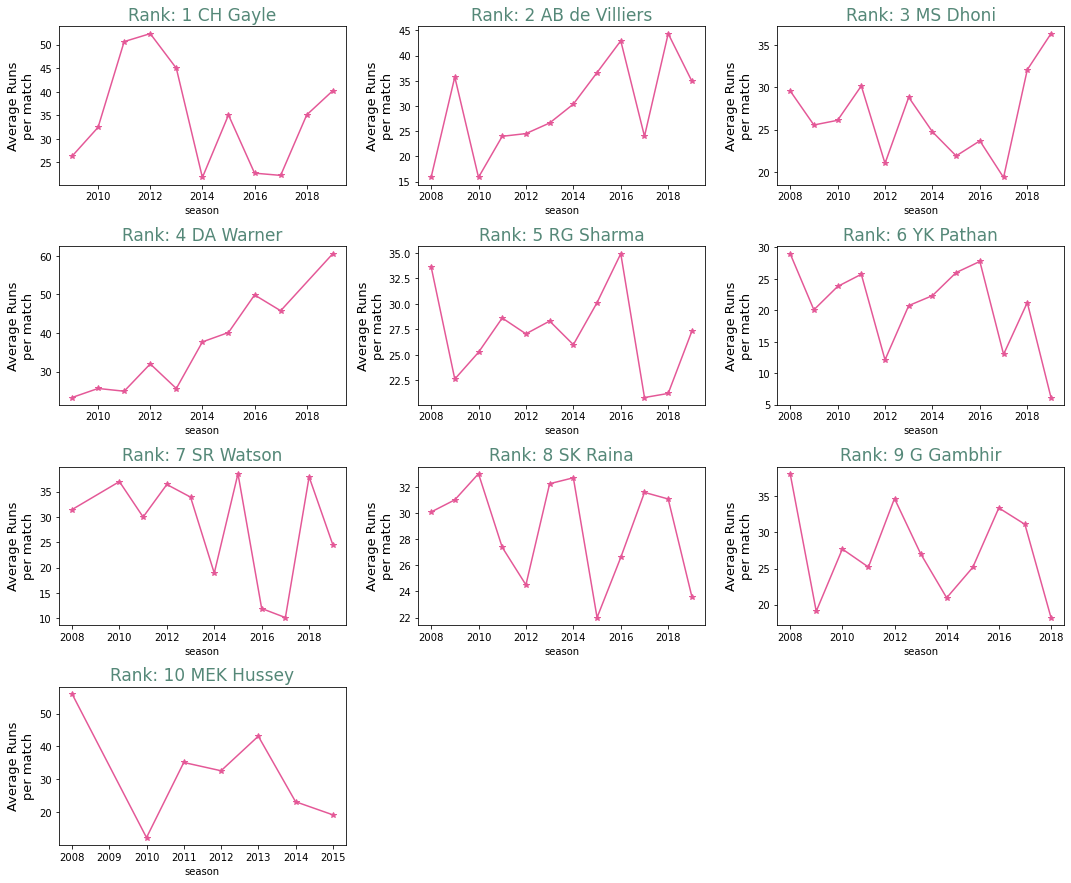

In [45]:
# TrendLine for Top 15 Batsman:
# i.e. Top 15 is calculated as 
#      - Batsmen who have scored the maximum number of "Man of The Match" in IPL in all the given seasons:

# Shortlisting the top 15 and making it into a list object
a = df_matches['player_of_match'].value_counts()[:10]
best_batsmen_list = list(a.index)


# By iterating through every batsman in the list, the mean of (batsman runs/match) is calculated for every season
# The result is updated into a dictionary: key: batsman_name value:Dataframe that contains season and batsman_runs average

# This required me to merge data from df_matches and df_delv by match_id to get season info.

batsman_trend = pd.DataFrame()
dictionary = {}

for batsman in best_batsmen_list:         
    batsman_Y = df_deliveries[df_deliveries['batsman']== batsman]
    s = batsman_Y.groupby(['match_id'],as_index=False)['batsman_runs'].sum()
    merged = pd.merge(s,df_matches,left_on='match_id',right_on='id')
    merged.season = merged.season.astype(int)
    batsman_Y_per_season = merged.groupby(['season'], as_index=False)['batsman_runs'].mean()
    dictionary.update({batsman:batsman_Y_per_season})
 
fig = plt.figure(figsize=(15,15))
i = 5
j = 3
k = 1

# Iterating through all the values in the dictionary, line plot done for every batsman

for key,value in dictionary.items():   
    
    ax = plt.subplot(i,j,k)
    #print(subplot)
    ax.plot(value['season'],value['batsman_runs'], marker='*',color='#E45897')
    title = str("Rank: "+ str(k)+" "+key) 
    ax.set_title(title,fontsize=17,color="#558878")
    ax.set_xlabel("season")
    ax.set_ylabel("Average Runs\nper match", fontsize=13)
    k = k+1

plt.tight_layout()
plt.show();
  

##Inference

From the graph, DA Warner, AB DE Villiers seems to have shown a consistent improvement in the performance.
All the others have spikes representing, 1 match goes too well and another not so well.
Also the trend is shown only for batting scores. So if one of the top 10 (chosen as per 'Playerof the Match') is not a Batsman, then his trend could be weak in the above graphs.

##Batsman's Metrics:
The Following Metrics are identified to represent the characteristics of a Batsman.

Hard hitting ability - no of 4/6 / no of balls played
Finisher or not - No of matches not out
Fast scoring ability - strike rate - Total runs/Total balls in every match - Average
consistency - average runs/Match

I have calaculated the above Metrics for all the Batsmen. Based upon the score, top 15 Batsmen are determined and their Metrics are plotted.


#Metric 1: Hard hitting ability - no. of 4-s or 6-6 / Total number of balls played


In [109]:
# Calculating for 1 batsman:
batsman_1 = df_deliveries[df_deliveries['batsman'] == 'V Sehwag']
#print((batsman_1[(batsman_1['batsman_runs'] == 4) | (batsman_1['batsman_runs'] == 6)]['batsman_runs'].count()/batsman_1['batsman'].count())* 100)
#batsman_1['batsman'].count()

#get top batsmen: - batsmen who played atleast 50 balls total:
x = df_deliveries.groupby('batsman',as_index=False)['match_id'].count()
x = x[x['match_id'] >= 50]

#x = df_delv['batsman'].value_counts()[:200]
batsman_list = pd.Index.tolist(x.batsman)
#print(batsman_list)
batsmen_atleast_50_balls = pd.DataFrame()

for batsman in batsman_list:
    #print("bowler: ", bowler)
    x = df_deliveries[df_deliveries['batsman'] == batsman]
    batsmen_atleast_50_balls = pd.concat([x,batsmen_atleast_50_balls])

# DataFrame of all the data for players who played atleast 50 balls
#batsmen_atleast_50_balls

# Apply to all the batsman in the batsmen_atleast_50_balls DataFrame:

hard_hitting = batsmen_atleast_50_balls.groupby('batsman').apply(lambda x: (x[(x['batsman_runs'] == 4) | (x['batsman_runs'] == 6)]['batsman_runs'].count()/x['batsman'].count())* 100)
hard_hitting = pd.DataFrame(hard_hitting.reset_index())
hard_hitting.rename(columns={0:"percentage_of_4_or_6"}, inplace=True)
hard_hitting_15 = hard_hitting.sort_values('percentage_of_4_or_6',ascending=False)[:15]
#hard_hitting_15 

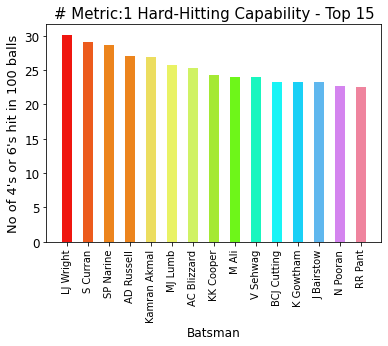

In [110]:
color_band = ['#EF160F', '#EC5B1D', '#EC841D','#EC841D', '#ECDD5F','#E9F264','#D0F264','#A5E934','#6EF619','#19F6BF','#19F4F6','#19D0F6','#5FB7EE','#D484EF','#EF849E']
plt.bar(hard_hitting_15['batsman'],hard_hitting_15['percentage_of_4_or_6'], width=0.5, color=color_band)
plt.title("# Metric:1 Hard-Hitting Capability - Top 15", fontsize=15)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel("No of 4's or 6's hit in 100 balls", fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)

#for i in hard_hitting_15.iterrows():
    #plt.text(i[1]['percentage_of_4_or_6'],i[1].batsman, i[1].batsman, horizontalalignment='right', verticalalignment='center', color='black', fontsize=12)
    #plt.text(i[1]['percentage_of_4_or_6'],i[1].batsman, round(i[1]['percentage_of_4_or_6'],1), horizontalalignment='left', verticalalignment='center', fontsize=13)
    
plt.show()


Metric 2: Finisher or Not: No of Matches NOT OUT

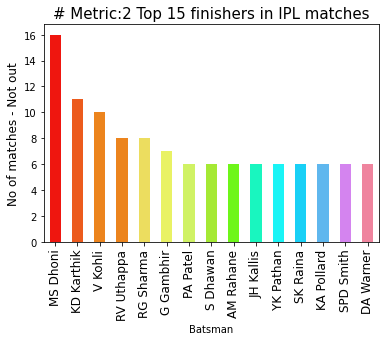

In [112]:
# 2. Finisher or not 

player_dismissed = df_deliveries[df_deliveries['player_dismissed'].notnull()][['match_id','batsman','non_striker','player_dismissed']]
#p1 = player_dismissed[player_dismissed['match_id'] == 1
#p1[p1['batsman'] != p1['player_dismissed']][['match_id','batsman']]

finishers = player_dismissed[player_dismissed['batsman'] != player_dismissed['player_dismissed']][['match_id','batsman']]
finishers.rename(columns={'batsman':'finisher'},inplace=True)
finishers = finishers['finisher'].value_counts()[:15]

finishers.plot.bar(color=color_band)
plt.xlabel("Batsman")
plt.xticks(fontsize=12)
plt.ylabel("No of matches - Not out", fontsize=12)
plt.title("# Metric:2 Top 15 finishers in IPL matches", fontsize=15)

plt.show()


Metric 3: Fast scoring ability - strike rate - Runs/100 ball

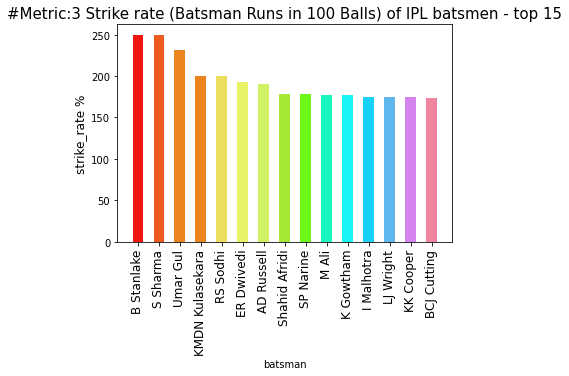

In [115]:
# 3. Fast scoring ability - strike rate - Total runs/Total balls

d1 = df_deliveries[df_deliveries['batsman'] == 'S Dhawan'][['match_id','batsman','total_runs','batsman_runs']]
#print(d1['total_runs'].sum()/d1.shape[0])
strike_rate = pd.DataFrame()
strike_rate['batsman'] = pd.Series(df_deliveries['batsman'])
strike_rate['strike_rate'] = pd.Series(d1['total_runs'].sum() / d1.shape[0])

strike_rate.dropna()

g = df_deliveries.groupby('batsman').apply(lambda x: (x['total_runs'].sum()/x.shape[0])*100)
strike_rate = g.reset_index()
strike_rate.rename(columns={0:'strike_rate'}, inplace=True)
strike_rate_top_15 = strike_rate.sort_values('strike_rate', ascending=False)[:15]
#strike_rate_top_15

plt.bar(strike_rate_top_15['batsman'], strike_rate_top_15['strike_rate'], width=0.5, color=color_band)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("batsman")
plt.ylabel("strike_rate %", fontsize=12)
plt.title("#Metric:3 Strike rate (Batsman Runs in 100 Balls) of IPL batsmen - top 15", fontsize=15)

#for i in strike_rate_top_15.iterrows():
    #plt.text(i[1]['percentage_of_4_or_6'],i[1].batsman, i[1].batsman, horizontalalignment='right', verticalalignment='center', color='black', fontsize=12)
    #plt.text(i[1].batsman,i[1]['strike_rate'], round(i[1]['strike_rate'],1), horizontalalignment='center', verticalalignment='bottom', fontsize=13)

plt.show()


Metric 4: Consistency - average of (Total runs/match)

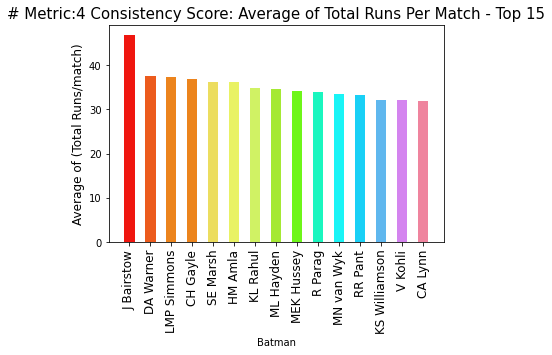

In [117]:
#4. consistency - average (Total runs/match)

subset = df_deliveries[df_deliveries['batsman'] == 'MS Dhoni'][['match_id','inning','batsman','batsman_runs']]
s = subset.groupby(['match_id','batsman'], as_index=False)['batsman_runs'].sum()
consistency_1 = s.groupby('batsman',as_index=False)['batsman_runs'].mean()
consistency_1 

Total_runs_per_match = df_deliveries.groupby(['match_id','batsman'], as_index=False)['batsman_runs'].sum()
consistency_score = Total_runs_per_match.groupby('batsman',as_index=False)['batsman_runs'].mean()
consistency_score_15 = consistency_score.sort_values('batsman_runs',ascending=False)[:15]
#consistency_score_15

plt.bar(consistency_score_15['batsman'],consistency_score_15['batsman_runs'], width=0.5, color=color_band)
plt.title("# Metric:4 Consistency Score: Average of Total Runs Per Match - Top 15", fontsize=15)
plt.xlabel('Batman')
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Average of (Total Runs/match)", fontsize=12)
plt.show()


# Bowler's Metrics
The Following Metrics are identified to represent the characteristics of a Bowler.

economy - no. of runs conceded/over - average
wicket taking ability - wickets/total no of balls*100
consistency - no of runs/no of wickets
crucial wicket taking ability - how many time 4 or 5 wickets taken/total no of innings played - high performance percentage
I have calaculated the above Metrics for all the Batsmen. Based upon the score, top 15 Batsmen are determined and their Metrics are plotted.

Metric 1: economy - no. of runs conceded/over - average

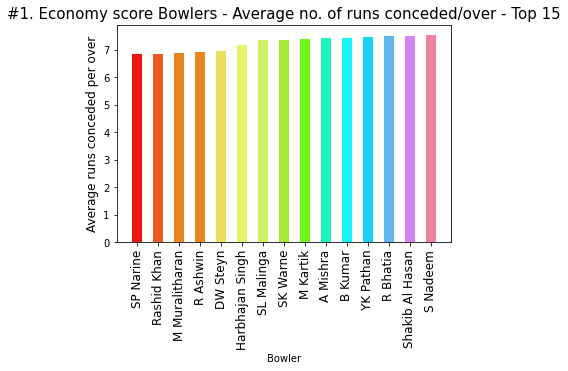

In [120]:
# 1. economy - no. of runs conceded/over - average

# Calculating for 1 Bowler
bowler_1 = df_deliveries[df_deliveries['bowler'] == 'TS Mills'][['match_id','over','bowler','total_runs']]
bowler_1

runs_per_over = bowler_1.groupby(['match_id','over','bowler'], as_index=False)['total_runs'].sum()
runs_per_over = runs_per_over['total_runs'].mean()
runs_per_over

#get top bowlers:
x = df_deliveries['bowler'].value_counts()[:50]
bowlers_list = pd.Index.tolist(x.index)
top_50_bowlers = pd.DataFrame()

for bowler in bowlers_list:
    #print("bowler: ", bowler)
    x = df_deliveries[df_deliveries['bowler'] == bowler]
    top_50_bowlers = pd.concat([x,top_50_bowlers])

#top_50_bowlers

# Applying for top 50 Bowlers
runs_per_over = top_50_bowlers.groupby(['match_id','over','bowler'], as_index=False)['total_runs'].sum()
economy = runs_per_over.groupby('bowler', as_index=False)['total_runs'].mean()
economy.rename(columns={'total_runs':'Average runs conceded per over'}, inplace=True)
economy_15 = economy.sort_values('Average runs conceded per over')[:15]
#economy_15

plt.bar(economy_15['bowler'],economy_15['Average runs conceded per over'], width=0.5, color=color_band)
plt.title("#1. Economy score Bowlers - Average no. of runs conceded/over - Top 15", fontsize=15)
plt.xlabel('Bowler')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("Average runs conceded per over", fontsize=12)
plt.yticks()
plt.show()


Metrics 2: wicket taking ability - wickets/total no of balls*100

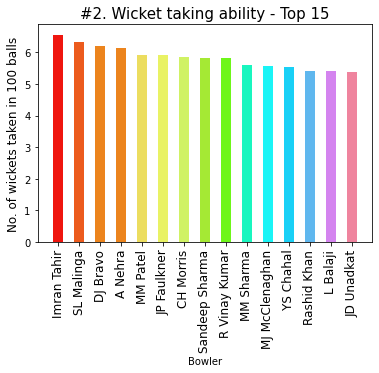

In [122]:
# 2. wicket taking ability - wickets/total no of balls*100

#get top bowlers:
x = df_deliveries['bowler'].value_counts()[:50]
bowlers_list = pd.Index.tolist(x.index)
top_50_bowlers = pd.DataFrame()

for bowler in bowlers_list:
    #print("bowler: ", bowler)
    x = df_deliveries[df_deliveries['bowler'] == bowler]
    top_50_bowlers = pd.concat([x,top_50_bowlers])

#top_50_bowlers

# Calculating for 1 bowler
bowler_2 = top_50_bowlers[top_50_bowlers['bowler'] == 'TS Mills']
#print(bowler_2['dismissal_kind'].count())
#print(bowler_2.shape[0])
#print((bowler_2['dismissal_kind'].count()/bowler_2.shape[0])*100)

# Applying for top 50 Bowlers:
wicket_no_of_balls = top_50_bowlers.groupby('bowler').apply(lambda x: (x['dismissal_kind'].count()/x.shape[0])*100 )
wicket_no_of_balls = pd.DataFrame((wicket_no_of_balls.reset_index()))
wicket_no_of_balls.rename(columns={0:"wicket percentage"}, inplace=True)
wicket_no_of_balls_15 = wicket_no_of_balls.sort_values('wicket percentage',ascending=False)[:15]
#wicket_no_of_balls_15

plt.bar(wicket_no_of_balls_15['bowler'],wicket_no_of_balls_15['wicket percentage'], width=0.5, color=color_band)
plt.title("#2. Wicket taking ability - Top 15", fontsize=15)
plt.xlabel("Bowler")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("No. of wickets taken in 100 balls", fontsize=12)
plt.show()


Metrics 3: Consistency Score: No. of Balls_per Wicket

g:\python setup\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
g:\python setup\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


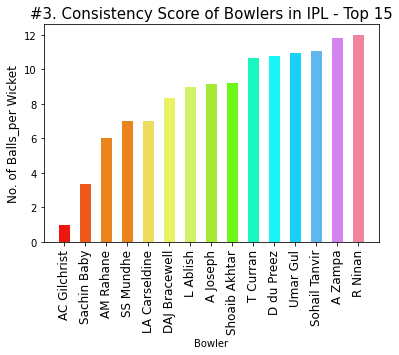

In [123]:
#3. Consistency Score:
bowler_2['bowler'].count()/bowler_2['dismissal_kind'].count()

consistency_score = df_deliveries.groupby('bowler').apply(lambda x: x['bowler'].count()/x['dismissal_kind'].count())
consistency_score = pd.DataFrame(consistency_score.reset_index())
consistency_score
consistency_score.rename(columns={0:'No. of Balls_per Wicket'}, inplace=True)
consistency_score_15_bowlers = consistency_score.sort_values('No. of Balls_per Wicket')[:15]
#consistency_score_15_bowlers

plt.bar(consistency_score_15_bowlers.bowler, consistency_score_15_bowlers['No. of Balls_per Wicket'], width=0.5, color=color_band)
plt.title("#3. Consistency Score of Bowlers in IPL - Top 15", fontsize=15)
plt.xlabel('Bowler')
plt.ylabel('No. of Balls_per Wicket', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.show()

Metric 4: crucial wicket taking ability : how many time 4 or 5 wickets taken/total no of innings played - high performance percentage

g:\python setup\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


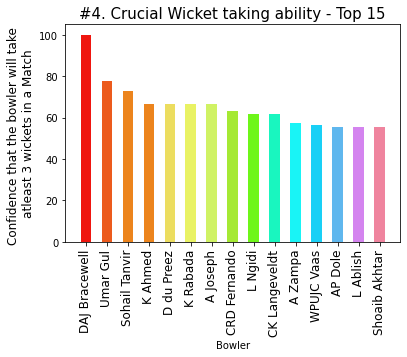

In [124]:
# 4. crucial wicket taking ability 
# - how many time 4 or 5 wickets taken/total no of innings played - high performance percentage

#print(bowler_2['player_dismissed'].count()/4)
#print(bowler_2['match_id'].nunique())
(bowler_2['player_dismissed'].count()/4)/bowler_2['match_id'].nunique()* 100

high_performance_percentage = df_deliveries.groupby('bowler').apply(lambda x: (x['player_dismissed'].count()/3)/x['match_id'].nunique()* 100)
high_performance_percentage = pd.DataFrame(high_performance_percentage.reset_index())
high_performance_percentage.rename(columns={0:'performance percentage'}, inplace=True)
high_performance_percentage_15 = high_performance_percentage.sort_values('performance percentage', ascending=False)[:15]

plt.bar(high_performance_percentage_15['bowler'],high_performance_percentage_15['performance percentage'], width=0.5, color=color_band)
plt.title("#4. Crucial Wicket taking ability - Top 15", fontsize=15)
plt.xlabel("Bowler")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Confidence that the bowler will take \natleast 3 wickets in a Match", fontsize=12)
plt.show()